In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds = pd.read_csv('/goldstock v1.csv')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [ ]:
ds

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [ ]:
ds.isnull().sum()

,0
Unnamed: 0,0
Date,0
Close,0
Volume,0
Open,0
High,0
Low,0


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
ss = StandardScaler()


In [ ]:
X = ds.select_dtypes(include=np.number).values

In [ ]:
X = ss.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
WCSS=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

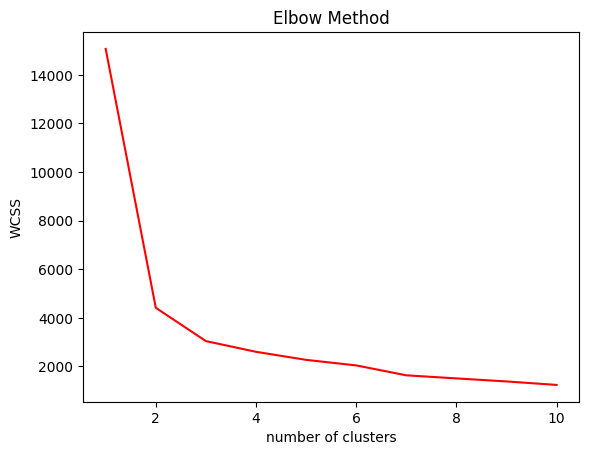

In [ ]:
plt.plot(range(1,11),WCSS,color='red')
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(n_clusters =3, init = 'k-means++',random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
YpredKM = kmeans.predict(X)

In [ ]:
YpredKM


array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

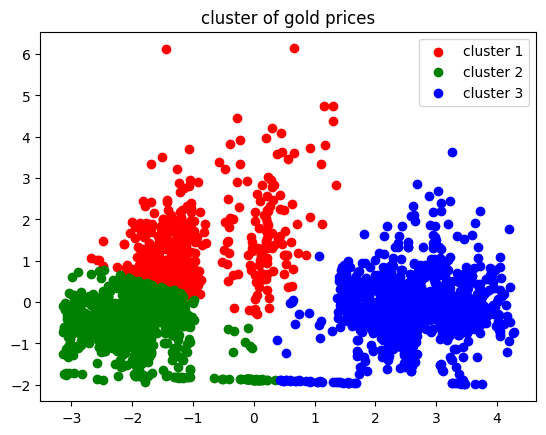

In [ ]:
plt.scatter(X_pca[YpredKM==0,0],X_pca[YpredKM==0,1],color = 'red',label='cluster 1')
plt.scatter(X_pca[YpredKM==1,0],X_pca[YpredKM==1,1],color = 'green',label = 'cluster 2')
plt.scatter(X_pca[YpredKM==2,0],X_pca[YpredKM==2,1],color = 'blue',label = 'cluster 3')
plt.title('cluster of gold prices')
plt.legend()
plt.show()

In [ ]:
from scipy.cluster import hierarchy as sch

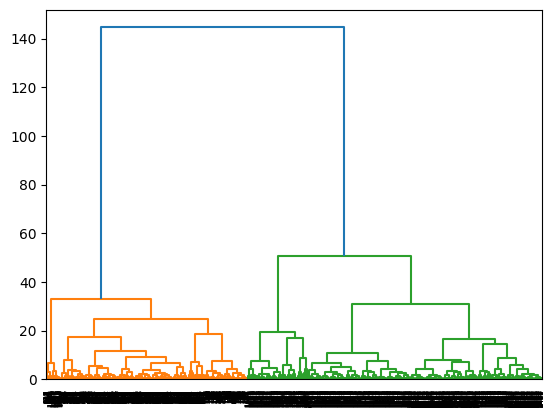

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3,linkage='ward')

In [ ]:
YpredHC = hc.fit_predict(X)

In [ ]:
YpredHC

array([0, 0, 0, ..., 1, 1, 1])

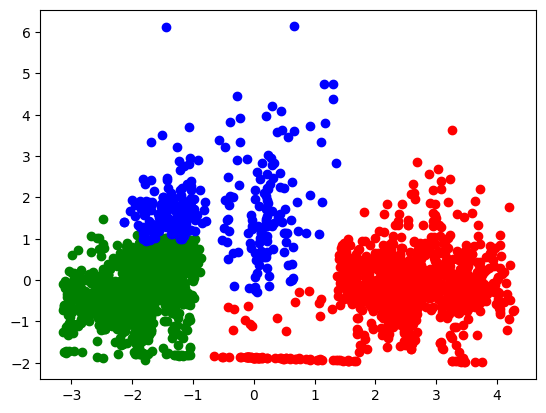

In [ ]:
plt.scatter(X_pca[YpredHC==0,0],X_pca[YpredHC==0,1],color='red',label='cluster 1')
plt.scatter(X_pca[YpredHC==1,0],X_pca[YpredHC==1,1],color='green',label='cluster 1')
plt.scatter(X_pca[YpredHC==2,0],X_pca[YpredHC==2,1],color='blue',label='cluster 1')